In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [5]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

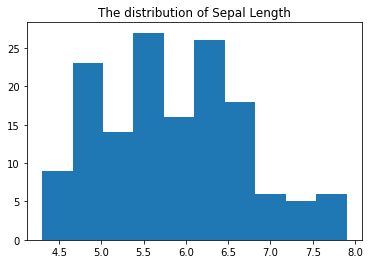

In [7]:
plt.hist(df.SepalLengthCm)
plt.title('The distribution of Sepal Length')
plt.show()

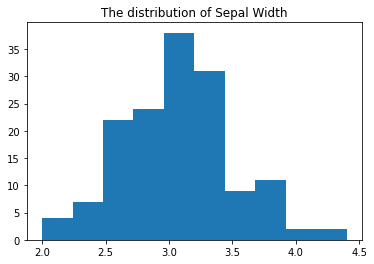

In [8]:
plt.hist(df.SepalWidthCm)
plt.title('The distribution of Sepal Width')
plt.show()

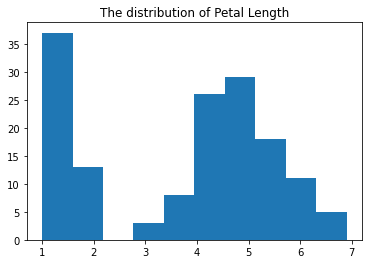

In [9]:
plt.hist(df.PetalLengthCm)
plt.title('The distribution of Petal Length')
plt.show()

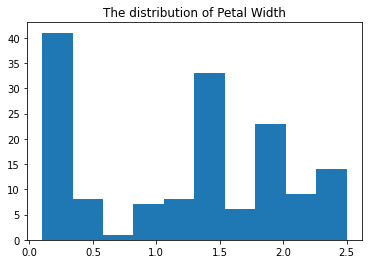

In [10]:
plt.hist(df.PetalWidthCm)
plt.title('The distribution of Petal Width')
plt.show()

In [11]:
species = df.Species.unique()
colors = ['red', 'orange', 'blue']

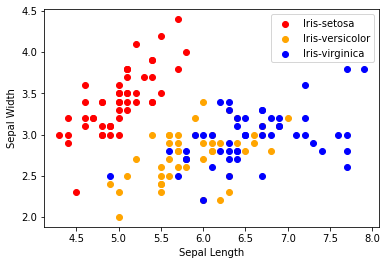

In [12]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x=x['SepalLengthCm'], y=x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

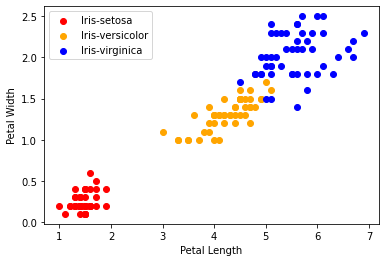

In [13]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x=x['PetalLengthCm'], y=x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

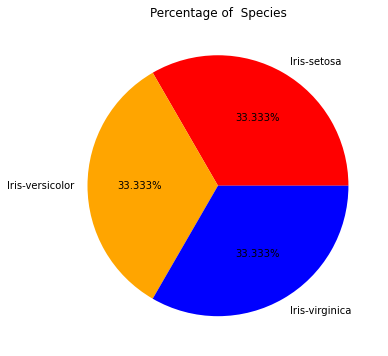

In [14]:
fig = plt.figure(figsize=(9,6))
plt.pie(df['Species'].value_counts(),colors=colors,labels=species,autopct='%1.3f%%')
plt.title('Percentage of  Species')
plt.show()

In [15]:
y=df.iloc[:,-1]
x=df.iloc[:,1:5]

In [16]:
print(x)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [17]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object


### Dummy variabels
#### Converting Species to numbers to make classification on it
##### Iris-setosa==> 0
##### Iris-versicolor==>1
##### Iris-virginica==>2

In [18]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder=LabelEncoder()
y=LabelEncoder.fit_transform(y)

In [19]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### splitting our data

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Making  our model

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

classifier=DecisionTreeClassifier()
classifier.fit(x_train,y_train)
y_Test_Prediction=classifier.predict(x_test)

### Accuracy

In [22]:
from sklearn.metrics import accuracy_score
print("The Accuracy is : ", accuracy_score(y_test,y_Test_Prediction)*100,"%")

The Accuracy is :  100.0 %


# The Visualization of Decision Tree

In [23]:
features = df.columns[:4]
classes = df['Species'].unique().tolist()

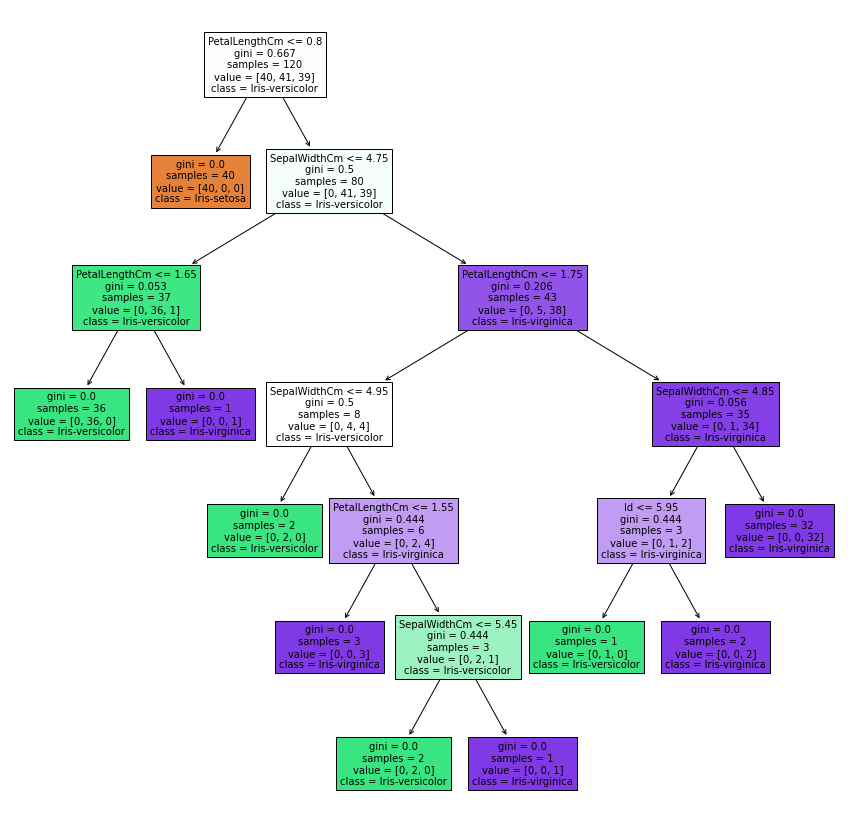

In [24]:
plt.figure(figsize=(15,15))
tree.plot_tree(classifier, feature_names = features, class_names = classes, filled = True)
plt.show()